# Liver Pateint Prediction

## Domain Analysis

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [61]:
data=pd.read_csv('/content/LiverPatientPred.csv')

In [62]:
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [63]:
# Header Arrangement

data=pd.read_csv('/content/LiverPatientPred.csv',header=None)

data.columns=['Age','Gender','TtBillrubin','Dirbillrubin','Al_phos','amt','ast','Protiens','Albumin','Al_Gl_ratio','Outcome']

In [64]:
data

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Feature Insights


* **Age**: Age of the Patient

* **Gender**: Patient's Gender

* **Total Bilirubin**: Bilirubin is a yellowish pigment that forms when red blood cells break down. Elevated levels can indicate issues with liver function or blood disorders.Ideal Level: Less than 1.0 mg/dL.
Elevated Levels: Levels above the ideal range can indicate various liver disorders, such as hepatitis, cirrhosis, or bile duct obstruction.

* **Direct Bilirubin**: This is a type of bilirubin that is conjugated in the liver and excreted into the bile. Elevated levels can indicate problems with liver or bile duct function.Ideal Level: Typically less than 0.3 mg/dL.
Elevated Levels: Elevated direct bilirubin levels can be indicative of liver or bile duct problems.

* **Alkaline Phosphatase**: An enzyme found in the liver and bones. Elevated levels can indicate liver or bone disorders.Ideal Level: Generally ranges from 30 to 120 IU/L (values can vary based on the laboratory's reference range).
Elevated Levels: Higher levels may suggest liver or bone disorders, including liver disease or bone diseases.

* **Alamine Aminotransferase (ALT)**: Also known as SGPT, it's an enzyme found predominantly in the liver. Elevated levels can indicate liver damage or inflammation.Ideal Level: Normally less than 40 IU/L for men and less than 35 IU/L for women.
Elevated Levels: Elevated ALT levels are associated with liver inflammation or damage, often due to conditions like hepatitis or alcohol abuse.


* **Aspartate Aminotransferase (AST)**: Also known as SGOT, it's an enzyme found in the liver, heart, muscles, and other tissues. Elevated levels can indicate liver damage, heart issues, or muscle damage.Ideal Level: Typically below 40 IU/L for men and women.
Elevated Levels: Higher AST levels can indicate liver damage, heart problems, or muscle injury.

* **Total Proteins**: The total concentration of proteins in the blood, including albumin and globulins. Abnormal levels can indicate various health conditions.Ideal Level: Normally between 6.0 and 8.3 g/dL.
Elevated or Low Levels: Imbalances in total protein levels can be related to a variety of conditions, including liver and kidney diseases, malnutrition, or inflammation.


* **Albumin**: A protein produced by the liver that helps maintain blood volume and regulate fluid balance. Low levels can indicate liver disease or malnutrition.Ideal Level: Generally between 3.4 and 5.4 g/dL.
Low Levels: Reduced albumin levels are often associated with chronic liver diseases, malnutrition, or kidney disorders.


* **Albumin and Globulin Ratio**: The ratio of albumin to globulins in the blood. This ratio can provide insights into liver and kidney function, as well as other health conditions.Ideal Range: The normal range for the albumin/globulin ratio is typically around 1.0 to 2.2.
Interpretation: A lower ratio could indicate issues such as chronic liver disease or inflammation.

* **Outcome**: 1 - patient with  liver disease and 2 - patient with no liver disease disease

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           583 non-null    int64  
 1   Gender        583 non-null    object 
 2   TtBillrubin   583 non-null    float64
 3   Dirbillrubin  583 non-null    float64
 4   Al_phos       583 non-null    int64  
 5   amt           583 non-null    int64  
 6   ast           583 non-null    int64  
 7   Protiens      583 non-null    float64
 8   Albumin       583 non-null    float64
 9   Al_Gl_ratio   579 non-null    float64
 10  Outcome       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Insights

     Only the "Gender" column is Categorical

In [66]:
data.describe()

,Age,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## EDA

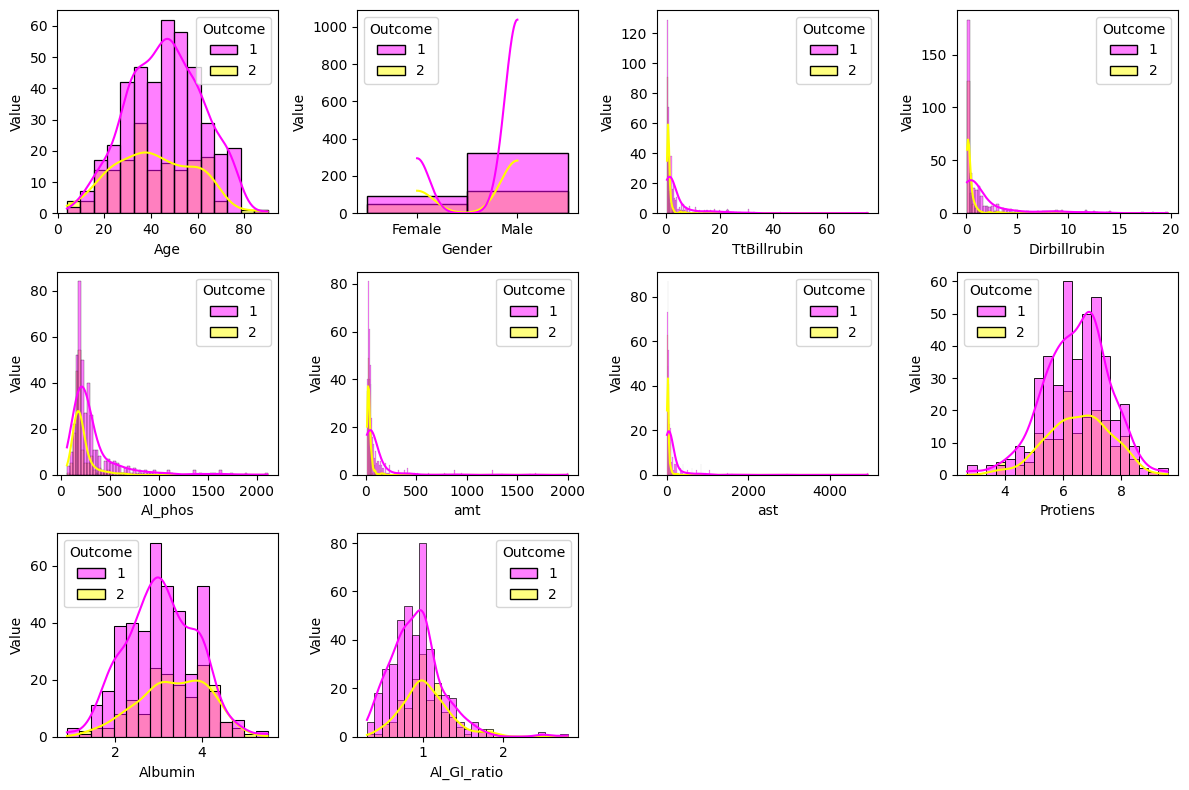

In [67]:
plt.figure(figsize=(12,8))
plotnumber=1

for column in data.drop('Outcome',axis=1):
  if plotnumber<11:
    ax=plt.subplot(3,4,plotnumber)
    sns.histplot(x=data[column],hue=data['Outcome'],palette='spring',kde=True,color='pink')
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Value',fontsize=10)
  plotnumber+=1
plt.tight_layout()

**Insights**

* 'Age' seems to be a factor in Liver disease as data shows patients above 30 have higher chance of Liver disease.
* Male patients have higher probability of diagnosed with Liver disease.
* 'Protiens' and 'Albumin' level of higher than 20 may have higher possibilities of Liver disease.
* Age, Protiens, Albumin represent normal distribution.


#### Correlation visualization

Text(0.5, 0.98, 'Total Billrubin vs Direct Billrubin')

<Figure size 400x200 with 0 Axes>

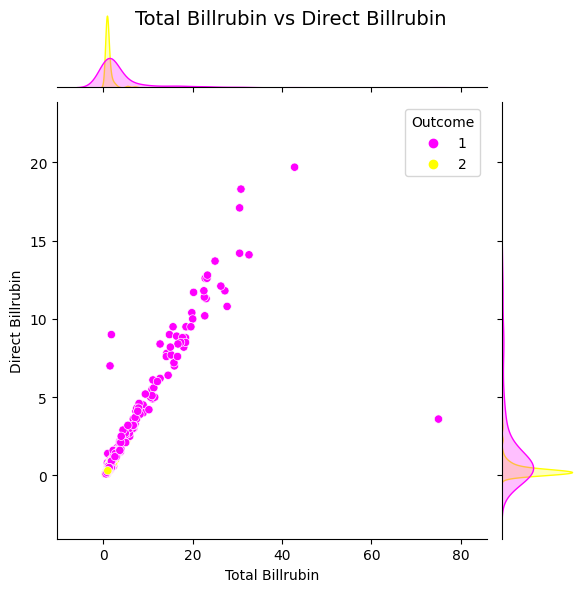

In [68]:
plt.figure(figsize=(4,2))
joint_plot= sns.jointplot(x="TtBillrubin", y="Dirbillrubin", data=data,hue='Outcome',palette='spring')
joint_plot.set_axis_labels("Total Billrubin", "Direct Billrubin")
joint_plot.fig.suptitle('Total Billrubin vs Direct Billrubin', fontsize=14)

Text(0.5, 0.98, 'Alamine Aminotransferase vs Aspartate Aminotransferase')

<Figure size 400x200 with 0 Axes>

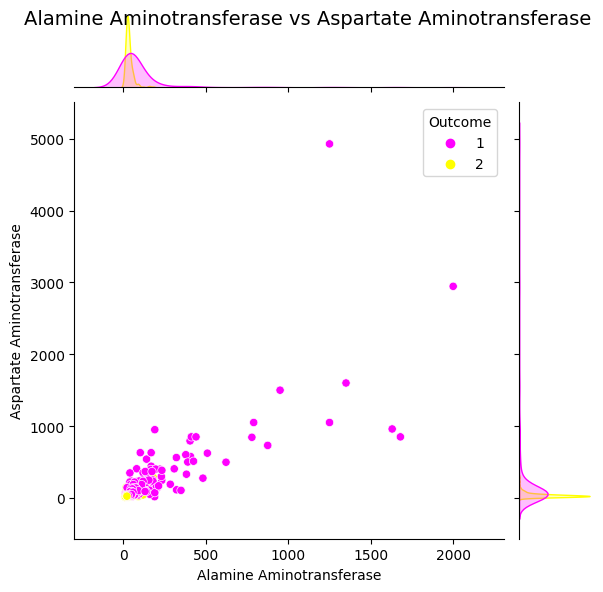

In [69]:
plt.figure(figsize=(4,2))
joint_plot= sns.jointplot(x="amt", y="ast", data=data,color='red',hue='Outcome',palette='spring')
joint_plot.set_axis_labels("Alamine Aminotransferase", "Aspartate Aminotransferase")
joint_plot.fig.suptitle('Alamine Aminotransferase vs Aspartate Aminotransferase', fontsize=14)

#### Insights
* There seems to be correlation between
   * Total Billrubin vs Direct Billrubin
   * Alamine Aminotransferase vs Aspartate Aminotransferase
* we might drop one of these features for model building,we can confirm this on Correlation matrix

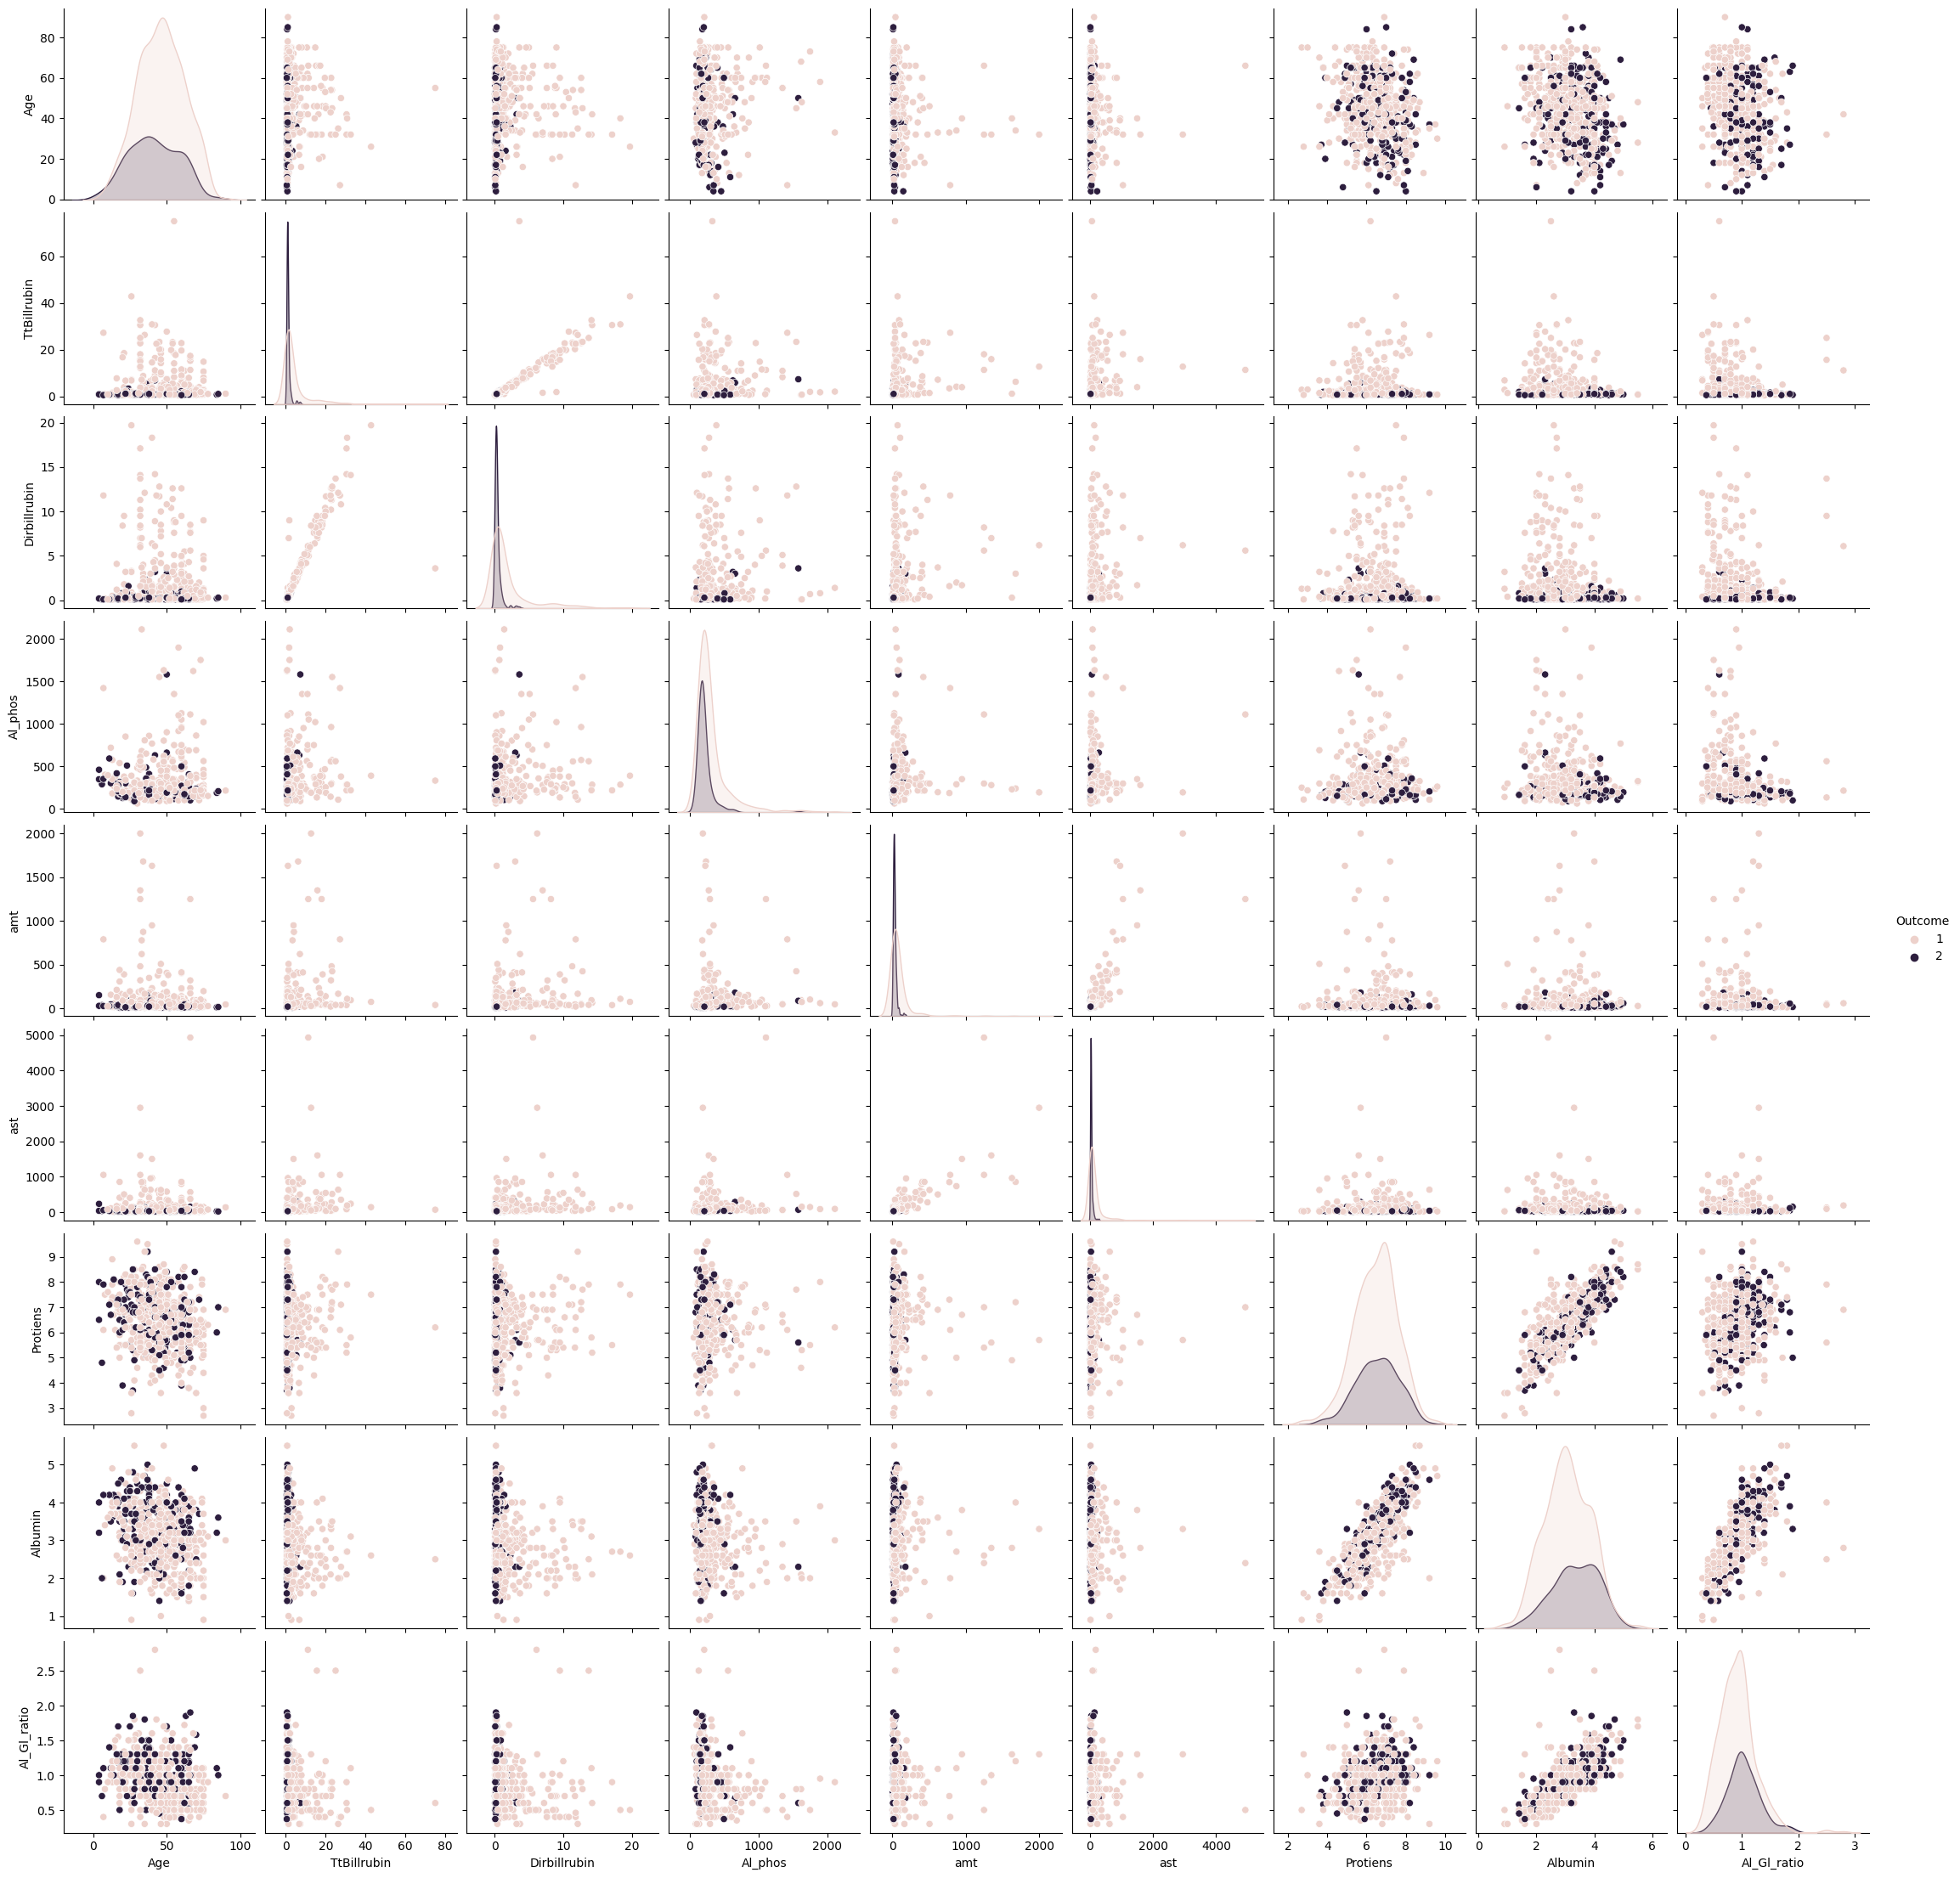

In [71]:
sns.pairplot(data,hue='Outcome')

## Data Preprocessing

In [72]:
data.isnull().sum()

Age             0
Gender          0
TtBillrubin     0
Dirbillrubin    0
Al_phos         0
amt             0
ast             0
Protiens        0
Albumin         0
Al_Gl_ratio     4
Outcome         0
dtype: int64

In [73]:
# Replacing missing values in Al_Gl_ratio with median as the data is skewed.

data.loc[data['Al_Gl_ratio'].isnull()==True,'Al_Gl_ratio']=data['Al_Gl_ratio'].median()

In [74]:
data.isnull().sum()

Age             0
Gender          0
TtBillrubin     0
Dirbillrubin    0
Al_phos         0
amt             0
ast             0
Protiens        0
Albumin         0
Al_Gl_ratio     0
Outcome         0
dtype: int64

In [75]:
data.duplicated().sum()

13

In [76]:
duplicates=data[data.duplicated()]
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
     Age  Gender  TtBillrubin  Dirbillrubin  Al_phos  amt  ast  Protiens  \
19    40  Female          0.9           0.3      293  232  245       6.8   
26    34    Male          4.1           2.0      289  875  731       5.0   
34    38  Female          2.6           1.2      410   59   57       5.6   
55    42    Male          8.9           4.5      272   31   61       5.8   
62    58    Male          1.0           0.5      158   37   43       7.2   
106   36    Male          5.3           2.3      145   32   92       5.1   
108   36    Male          0.8           0.2      158   29   39       6.0   
138   18    Male          0.8           0.2      282   72  140       5.5   
143   30    Male          1.6           0.4      332   84  139       5.6   
158   72    Male          0.7           0.1      196   20   35       5.8   
164   39    Male          1.9           0.9      180   42   62       7.4   
174   31    Male          0.6           0.1      175   48   34       6.

In [77]:
# Remvoing the duplicated data

df=data.drop_duplicates(keep='first')
df

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [78]:
print('Outcome: ',df.Outcome.unique())
print(df.Outcome.value_counts())

Outcome:  [1 2]
1    406
2    164
Name: Outcome, dtype: int64


In [79]:
# Replace 'No Liver disease' to 0 from 2 in Outcome

df.Outcome.replace(2,0,inplace= True)
print('Outcome: ',df.Outcome.unique())
print(df.Outcome.value_counts())

Outcome:  [1 0]
1    406
0    164
Name: Outcome, dtype: int64


## Outliers handling

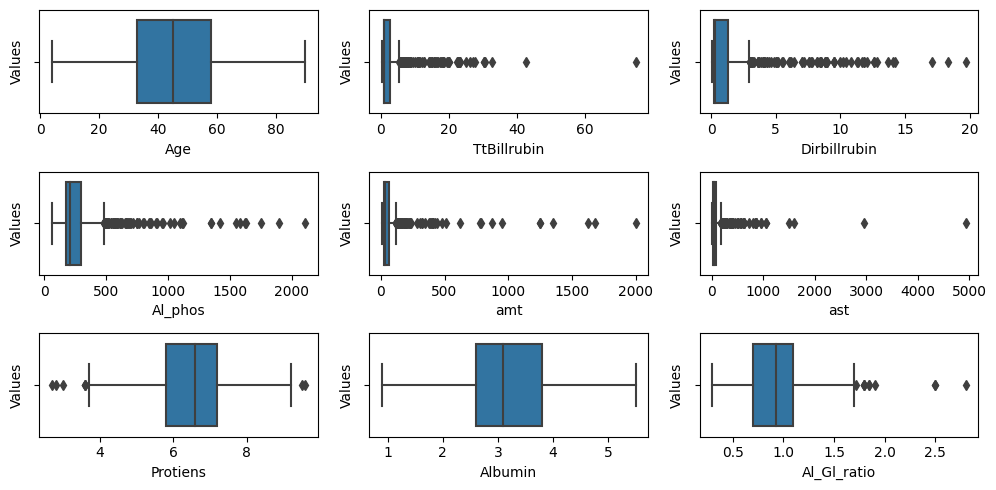

In [80]:
# To Check Outliers

plt.figure(figsize=(10,5))
plotnumber=1

columns_to_drop=['Outcome','Gender']

for column in df.drop(columns=columns_to_drop,axis=1):
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Values',fontsize=10)
  plotnumber+=1
plt.tight_layout()

 **Insights**

* Except Age and Albumin all other features have Outliers

In [81]:
from scipy import stats






## Outliers handling


### 'TrBillrubin' - Total Billrubin

In [82]:
IQR=stats.iqr(df.TtBillrubin,interpolation='midpoint')
Q1=df.TtBillrubin.quantile(0.25)
Q3=df.TtBillrubin.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [83]:
df.loc[data['TtBillrubin']>max_limit]

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1


In [84]:
len(df.loc[data['TtBillrubin']>max_limit])/len(df)*100

14.561403508771932

#### As 'TlBillrubin' has 15% outliers which may have some pattern related to Liver disease, we are not handling outliers in TlBillrubin

### Dirbillrunin - 'Direct Billrubin'

In [85]:
IQR=stats.iqr(df.Dirbillrubin,interpolation='midpoint')
Q1=df.Dirbillrubin.quantile(0.25)
Q3=df.Dirbillrubin.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [86]:

df.loc[data['Dirbillrubin']>max_limit]

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1


In [87]:
len(df.loc[data['Dirbillrubin']>max_limit])/len(df)*100

14.035087719298245

#### As 'Dirbillrubin' has 14% outliers which may have some pattern related to Liver disease, we are not handling outliers in TlBillrubin

### Al_Phos - 'Alkaline Phosphatease

In [88]:
IQR=stats.iqr(df.Al_phos,interpolation='midpoint')
Q1=df.Al_phos.quantile(0.25)
Q3=df.Al_phos.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [89]:
df.loc[df['Al_phos']>max_limit]

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
20,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1
21,51,Male,2.9,1.3,482,22,34,7.0,2.4,0.50,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
...,...,...,...,...,...,...,...,...,...,...,...
549,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.60,1
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1


In [90]:

len(df.loc[df['Al_phos']>max_limit])/len(df)*100

12.105263157894736

#### 'Al_phos' has 12% outliers which may have some pattern related to Liver disease, so we are not handling outliers in Al_phos

### amt - 'Alamine Aminotransferase'

In [91]:
IQR=stats.iqr(df.amt,interpolation='midpoint')
Q1=df.amt.quantile(0.25)
Q3=df.amt.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [92]:
df.loc[df['amt']>max_limit]

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
16,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.3,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.9,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.4,1
561,66,Male,16.6,7.6,315,233,384,6.9,2.0,0.4,1
562,66,Male,17.3,8.5,388,173,367,7.8,2.6,0.5,1
569,16,Male,7.7,4.1,268,213,168,7.1,4.0,1.2,1


In [93]:
len(df.loc[df['amt']>max_limit])/len(df)*100

12.631578947368421

#### 'amt' has 13% outliers which may have some pattern related to Liver disease, so we are not handling outliers in amt

### ast - 'Aspartate Aminotransferase'

In [94]:
IQR=stats.iqr(df.ast,interpolation='midpoint')
Q1=df.ast.quantile(0.25)
Q3=df.ast.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [95]:
df.loc[df['ast']>max_limit]

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
16,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.3,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.2,1
43,50,Male,2.6,1.2,415,407,576,6.4,3.2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
548,42,Male,11.1,6.1,214,60,186,6.9,2.8,2.8,1
558,51,Male,4.0,2.5,275,382,330,7.5,4.0,1.1,1
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.4,1
561,66,Male,16.6,7.6,315,233,384,6.9,2.0,0.4,1


In [96]:
len(df.loc[df['ast']>max_limit])/len(df)*100

11.578947368421053

#### 'ast' has 12% outliers which may have some pattern related to Liver disease, so we are not handling outliers in ast

### Protiens - 'Total Protiens'

In [97]:
IQR=stats.iqr(df.Protiens,interpolation='midpoint')
Q1=df.Protiens.quantile(0.25)
Q3=df.Protiens.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [98]:
len(df.loc[df['Protiens']>max_limit])/len(df)*100

0.3508771929824561

In [99]:
len(df.loc[df['Protiens']<min_limit])/len(df)*100

1.0526315789473684

<Axes: xlabel='Protiens', ylabel='Count'>

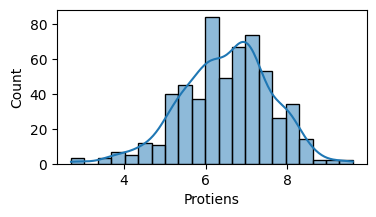

In [100]:
plt.figure(figsize=(4,2))
sns.histplot(x=df['Protiens'],kde=True)

#### As the 'Protiens' feature is normaly distributed in the data we are not handling the outliers

#### Al_Gl_Ratio - Albumin and Globulin Ratio

In [101]:
IQR=stats.iqr(df.Al_Gl_ratio,interpolation='midpoint')
Q1=df.Al_Gl_ratio.quantile(0.25)
Q3=df.Al_Gl_ratio.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [102]:
df.loc[df['Al_Gl_ratio']>max_limit]

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,0
215,66,Male,0.6,0.2,100,17,148,5.0,3.3,1.90,0
238,35,Female,0.9,0.2,190,40,35,7.3,4.7,1.80,0
243,28,Female,0.9,0.2,316,25,23,8.5,5.5,1.80,1
267,43,Female,0.9,0.3,140,12,29,7.4,3.5,1.80,1
484,62,Male,5.0,2.1,103,18,40,5.0,2.1,1.72,1
491,27,Male,1.0,0.3,180,56,111,6.8,3.9,1.85,0
548,42,Male,11.1,6.1,214,60,186,6.9,2.8,2.80,1
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1


In [103]:
len(df.loc[df['Al_Gl_ratio']>max_limit])/len(df)*100

1.7543859649122806

<Axes: xlabel='Al_Gl_ratio', ylabel='Count'>

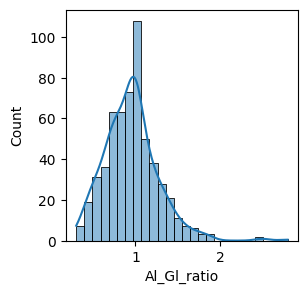

In [104]:
plt.figure(figsize=(3,3))
sns.histplot(x=df['Al_Gl_ratio'],kde=True)

#### As High level Liver disease patient may have Albumin and Globulin Ratio of above 2.0 to 2.5 we are not handling outliers

## Conversion of Categorical data into Numerical data

#### Encoding Gender using Label Encoder

In [105]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

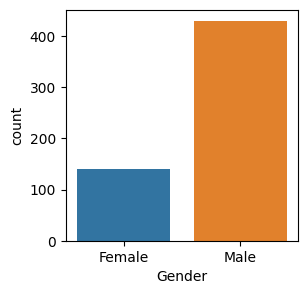

In [106]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['Gender'])

In [107]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df.Gender= label.fit_transform(df.Gender)

In [108]:
df

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


##Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
df.iloc[:,:-1]=scaling.fit_transform(df.iloc[:,:-1])

In [110]:
df

,Age,Gender,TtBillrubin,Dirbillrubin,Al_phos,amt,ast,Protiens,Albumin,Al_Gl_ratio,Outcome
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,0
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1


## Feature Engineering

<Axes: >

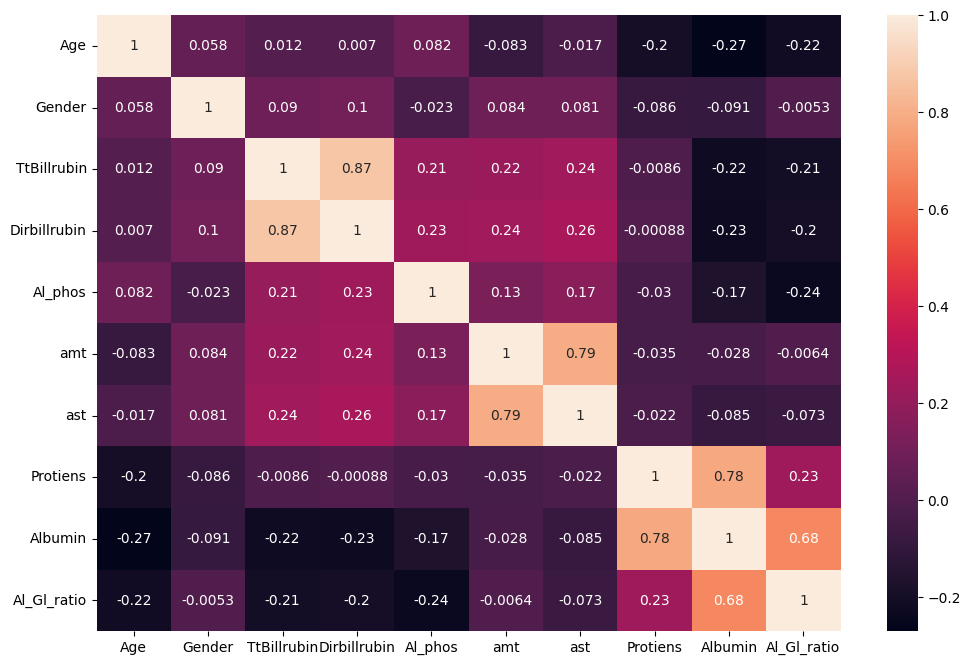

In [111]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('Outcome',axis=1).corr(),annot=True)

**Insights**
* As there is Higher Correlation among
  * TotalBillrubin and DirectBillrubin
  * Aspartate Aminotransferase and Alamine Aminotransferase
*We are dropping two columns for model building

In [112]:
df.drop(['Dirbillrubin','ast'],axis='columns',inplace=True)

## Model building

In [113]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [114]:
y.value_counts()

1    406
0    164
Name: Outcome, dtype: int64

In [117]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [118]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [119]:
# Using Smote data balanced
from collections import Counter
print(Counter(y_train))
print(Counter(y_smote))

Counter({1: 279, 0: 120})
Counter({1: 279, 0: 279})


### The Data is imbalanced and as it's a Liver disease prediction model, We will focus on minimizing
*False Negative* | *FalsePositive* , so the following metrics we will consider evaluation
* F1-score
* Recall
* Precision

## Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel= LogisticRegression()
LRmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Prediction using Logistic Regression Model
lr_pred= LRmodel.predict(x_test)

In [122]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
print('f1_score: ',f1_score(y_test,lr_pred)*100)
print('Precision score: ',precision_score(y_test,lr_pred)*100)
print('Recall socre: ',recall_score(y_test,lr_pred)*100)
print('Accuracy score: ',accuracy_score(y_test,lr_pred)*100)

f1_score:  86.3013698630137
Precision score:  76.36363636363637
Recall socre:  99.21259842519686
Accuracy score:  76.60818713450293


In [ ]:
pd.crosstab(y_test,lr_pred)

col_0,0,1
Outcome,,
0,5,39
1,1,126


In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.11      0.20        44
           1       0.76      0.99      0.86       127

    accuracy                           0.77       171
   macro avg       0.80      0.55      0.53       171
weighted avg       0.78      0.77      0.69       171



#### Hyper parameter Tuning Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C': [0.2,0.3,0.5,0.7,0.8,1,3,5,8,10,12], 'penalty': ['l1','l2']}
lrgrid=GridSearchCV(LRmodel,param_grid,scoring='f1',cv=2)
lrgrid.fit(x,y)

GridSearchCV(cv=2, estimator=LogisticRegression(C=1),
             param_grid={'C': [0.2, 0.3, 0.5, 0.7, 0.8, 1, 3, 5, 8, 10, 12],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [ ]:
print(lrgrid.best_params_)

{'C': 1, 'penalty': 'l2'}


In [ ]:
LRmodel=LogisticRegression(C=1,penalty='l2')
LRmodel.fit(x_train,y_train)

LogisticRegression(C=1)

In [ ]:
lr_pred1=LRmodel.predict(x_test)

In [ ]:
print('f1_score: ',f1_score(y_test,lr_pred1)*100)
print('Precision score: ',precision_score(y_test,lr_pred1)*100)
print('Recall socre: ',recall_score(y_test,lr_pred1)*100)
print('Accuracy score: ',accuracy_score(y_test,lr_pred1)*100)

f1_score:  86.3013698630137
Precision score:  76.36363636363637
Recall socre:  99.21259842519686
Accuracy score:  76.60818713450293


In [ ]:
confusion_matrix(y_test,lr_pred1)

array([[  5,  39],
       [  1, 126]])

## Applying SVC

In [ ]:
from sklearn.svm import SVC
SVCmodel= SVC()
SVCmodel.fit(x_train,y_train)

SVC()

In [ ]:
svc_pred=SVCmodel.predict(x_test)

In [ ]:
print('f1_score: ',f1_score(y_test,svc_pred)*100)
print('Precision score: ',precision_score(y_test,svc_pred)*100)
print('Recall socre: ',recall_score(y_test,svc_pred)*100)
print('Accuracy score: ',accuracy_score(y_test,svc_pred)*100)

f1_score:  85.23489932885906
Precision score:  74.26900584795322
Recall socre:  100.0
Accuracy score:  74.26900584795322


In [ ]:
confusion_matrix(y_test,svc_pred)

array([[  0,  44],
       [  0, 127]])

#### Hyper parameter tuning in SVC

In [ ]:
# GridSearch CV
from sklearn.model_selection import GridSearchCV
param_grid={'C':[75,5,8,10,20,30,60,3],'gamma':[0.001,0.0001,0.1,0.2,0.3,0.4,0.8,1,1.5],'random_state':[8,10,15,18]}
Svcgrid=GridSearchCV(SVCmodel,param_grid,verbose=2,scoring='f1',cv=3)
Svcgrid.fit(x,y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END ..................C=75, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=75, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=75, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=75, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=75, gamma=0.001, r

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [75, 5, 8, 10, 20, 30, 60, 3],
                         'gamma': [0.001, 0.0001, 0.1, 0.2, 0.3, 0.4, 0.8, 1,
                                   1.5],
                         'random_state': [8, 10, 15, 18]},
             scoring='f1', verbose=2)

In [ ]:
print(Svcgrid.best_params_)

{'C': 75, 'gamma': 0.001, 'random_state': 8}


In [ ]:
SVCmodel= SVC(C=75, gamma= 0.001, random_state= 8)
SVCmodel.fit(x_train,y_train)

SVC(C=75, gamma=0.001, random_state=8)

In [ ]:
svc_pred1=SVCmodel.predict(x_test)

In [ ]:
print('f1_score: ',f1_score(y_test,svc_pred1)*100)
print('Precision score: ',precision_score(y_test,svc_pred1)*100)
print('Recall socre: ',recall_score(y_test,svc_pred1)*100)
print('Accuracy score: ',accuracy_score(y_test,svc_pred1)*100)

f1_score:  85.23489932885906
Precision score:  74.26900584795322
Recall socre:  100.0
Accuracy score:  74.26900584795322


## Applying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFmodel= RandomForestClassifier()
RFmodel.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RF_pred=RFmodel.predict(x_test)

In [ ]:
print('f1_score: ',f1_score(y_test,RF_pred)*100)
print('Precision score: ',precision_score(y_test,RF_pred)*100)
print('Recall socre: ',recall_score(y_test,RF_pred)*100)
print('Accuracy score: ',accuracy_score(y_test,RF_pred)*100)

f1_score:  80.45112781954887
Precision score:  76.97841726618705
Recall socre:  84.25196850393701
Accuracy score:  69.5906432748538


In [ ]:
pd.crosstab(y_test,RF_pred)

col_0,0,1
Outcome,,
0,12,32
1,20,107


#### Hyper parameter Tuning in Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':list(int(x) for x in np.linspace(100,800,8)),
        'max_features':['auto','sqrt'],
        'bootstrap':[True,False],
        'max_depth':list(int(x) for x in np.linspace(10,100,9)),
        'min_samples_split':[2,4,8],
        'min_samples_leaf':[1,2,3]}
RFgrid= GridSearchCV(RFmodel,params,cv=5,scoring='f1',verbose=2)
RFgrid.fit(x,y)


In [ ]:
print(RFgrid.best_params_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
RFmodel=RandomForestClassifier(bootstrap=True, max_depth=80, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators= 120)
RFmodel.fit(x_train,y_train)

RandomForestClassifier(max_depth=80, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=120)

In [ ]:
RF_pred1=RFmodel.predict(x_test)

In [ ]:
print('f1_score: ',f1_score(y_test,RF_pred1)*100)
print('Precision score: ',precision_score(y_test,RF_pred1)*100)
print('Recall socre: ',recall_score(y_test,RF_pred1)*100)
print('Accuracy score: ',accuracy_score(y_test,RF_pred1)*100)

f1_score:  82.12927756653991
Precision score:  79.41176470588235
Recall socre:  85.03937007874016
Accuracy score:  72.51461988304094


In [ ]:
# Randomized SearchCV

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num=4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num=9)]
max_depth.append(None)
min_samples_split = [2, 5, 8, 10]
min_samples_leaf = [1, 2, 4, 6]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RFgrid1 = RandomForestClassifier(random_state=12)

RFmodel = RandomizedSearchCV(estimator= RFgrid1, scoring='accuracy',
                           param_distributions=random_grid, n_iter=50, cv=3,
                               verbose=2, random_state=12, n_jobs=-1)
RFmodel.fit(x_train, y_train)
RF_best_params = RFmodel.best_params_
print(f"Best paramters: {RF_best_params})")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best paramters: {'n_estimators': 67, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': True})


In [ ]:
RFmodel=RandomForestClassifier(bootstrap=True, max_depth=45, max_features='sqrt', min_samples_leaf=1, min_samples_split=8, n_estimators= 67)
RFmodel.fit(x_train,y_train)

RandomForestClassifier(max_depth=45, min_samples_split=8, n_estimators=67)

In [ ]:
RF_pred1=RFmodel.predict(x_test)

In [ ]:
print('f1_score: ',f1_score(y_test,RF_pred1)*100)
print('Precision score: ',precision_score(y_test,RF_pred1)*100)
print('Recall socre: ',recall_score(y_test,RF_pred1)*100)
print('Accuracy score: ',accuracy_score(y_test,RF_pred1)*100)

f1_score:  80.75471698113208
Precision score:  77.53623188405797
Recall socre:  84.25196850393701
Accuracy score:  70.17543859649122


## Apply XG Boost

In [127]:
!pip3 install xgboost

In [128]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
xgb_pred=xgb.predict(x_test)

In [130]:
print('f1_score: ',f1_score(y_test,xgb_pred,average='binary')*100)
print('Precision score: ',precision_score(y_test,xgb_pred,average='binary')*100)
print('Recall socre: ',recall_score(y_test,xgb_pred,average='binary')*100)
print('Accuracy score: ',accuracy_score(y_test,xgb_pred)*100)

f1_score:  80.0
Precision score:  79.6875
Recall socre:  80.31496062992126
Accuracy score:  70.17543859649122


In [131]:
pd.crosstab(y_test,xgb_pred)

col_0,0,1
Outcome,,
0,18,26
1,25,102


In [132]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.42      0.41      0.41        44
           1       0.80      0.80      0.80       127

    accuracy                           0.70       171
   macro avg       0.61      0.61      0.61       171
weighted avg       0.70      0.70      0.70       171



#### Hyper Parameter Tuning XG Boost

In [133]:
from sklearn.model_selection import RandomizedSearchCV
param_grid= {'max_depth': [2,3,4,6,12,20,25,30,35,40,60,100],
             'learning_rate': [0.1,0.3,0.5,0.8,0.025,1,0.006,0.04,1.2,0.0002,1.4,1.6],
             'gamma': [0.1,0.3,0.7,0.9,1.2,1.8,0.5,0.2,0.8,2,2.4,1.5],
             'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4],
             'reg_lamda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4],
             'n_estimators': [30,50,80,100,130,120,110,90,140,200,160,250],
             'min_child_weight': [2,4,5,6,7,8,9,15,11,16,20,33]}

In [134]:
xgb_grid=RandomizedSearchCV(estimator=xgb,scoring='f1',param_distributions=param_grid,n_iter=100,verbose=2,n_jobs=-1,cv=12,random_state=20)
xgb_grid.fit(x_train,y_train)
xgb_best_params=xgb_grid.best_params_
print(f'xgb_best_parameter: {xgb_best_params}')

Fitting 12 folds for each of 100 candidates, totalling 1200 fits
[06:20:23] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_lamda" } are not used.

xgb_best_parameter: {'reg_lamda': 0.8, 'reg_alpha': 25.6, 'n_estimators': 110, 'min_child_weight': 33, 'max_depth': 20, 'learning_rate': 0.04, 'gamma': 2}


In [135]:
xgb=XGBClassifier(reg_lamda= 0.8, reg_alpha= 25.6, n_estimators= 110, min_child_weight= 33, max_depth= 20, learning_rate= 0.04, gamma= 2)
xgb.fit(x_train,y_train)

[06:20:41] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_lamda" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=33, missing=nan, monotone_constraints=None,
              n_estimators=110, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [136]:
xgb_pred1=xgb.predict(x_test)

In [137]:
print('f1_score: ',f1_score(y_test,xgb_pred1,average='binary')*100)
print('Precision score: ',precision_score(y_test,xgb_pred1,average='binary')*100)
print('Recall socre: ',recall_score(y_test,xgb_pred1,average='binary')*100)
print('Accuracy score: ',accuracy_score(y_test,xgb_pred1)*100)

f1_score:  85.23489932885906
Precision score:  74.26900584795322
Recall socre:  100.0
Accuracy score:  74.26900584795322


In [138]:
confusion_matrix(y_test,xgb_pred1)

array([[  0,  44],
       [  0, 127]])

In [139]:
print(classification_report(y_test,xgb_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.74      1.00      0.85       127

    accuracy                           0.74       171
   macro avg       0.37      0.50      0.43       171
weighted avg       0.55      0.74      0.63       171



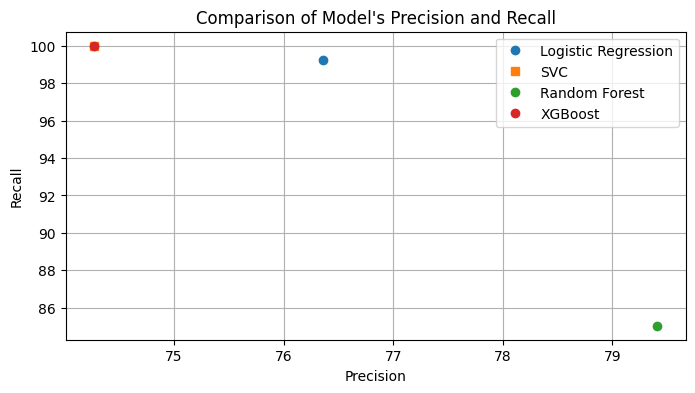

In [142]:
# Model Comparison with PRECISION and RECALL

models = ["Logistic Regression", "SVC", "Random Forest", "XGBoost"]
precision = [76.36363636363637, 74.26900584795322, 79.41176470588235, 74.26900584795322]
recall = [99.21259842519686, 100.0, 85.03937007874016, 100.0]

# Create the plot
plt.figure(figsize=(8, 4))
for i in range(len(models)):
    marker = "s" if models[i] == "SVC" else "o"
    plt.plot(precision[i], recall[i], marker=marker, linestyle="", label=models[i])

# Add labels and title
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Comparison of Model's Precision and Recall")
plt.legend()
plt.grid(True)
plt.show()


##Conclusion

  We evaluated four different machine learning models for the prediction of liver disease. The models considered in this evaluation are Logistic Regression, Support Vector Classifier (SVC), Random Forest, and XGBoost. The evaluation is based on key performance metrics, including precision and recall.

**Recall Comparison:**
- Logistic Regression: 99.21%
- SVC: 100.00%
- Random Forest: 85.04%
- XGBoost: 100.00%

Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual instances of liver disease. A higher recall indicates that the model is sensitive to identifying individuals with liver disease and minimizes false negatives.

SVC and XGBoost achieved perfect recall scores of 100.00%, meaning they correctly identified all individuals with liver disease. Logistic Regression also performed exceptionally well in recall at 99.21%. However, Random Forest, while achieving a good precision score, showed a slightly lower recall at 85.04%.

**Precision Comparison:**
- Logistic Regression: 76.36%
- SVC: 74.27%
- Random Forest: 79.41%
- XGBoost: 74.27%

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A higher precision indicates that the model makes fewer false positive predictions, which is important when minimizing the risk of misdiagnosing liver disease.

Among the models, the Random Forest model achieved the highest precision at 79.41%, indicating its ability to correctly identify individuals with liver disease while keeping false positives relatively low. Logistic Regression and XGBoost also performed reasonably well in terms of precision.



- Support Vector Classifier (SVC) and XGBoost demonstrated outstanding performance in terms of recall, correctly identifying all instances of liver disease in the dataset. This high recall indicates their suitability for sensitive applications where missing a case of liver disease is of utmost concern.

- Random Forest exhibited the highest precision among the models, indicating its ability to minimize false positive predictions. This model may be preferred in scenarios where avoiding unnecessary treatments or interventions is a priority.

- Logistic Regression performed well in both precision and recall, making it a balanced choice for liver disease prediction tasks.